<a href="https://colab.research.google.com/github/JAVerduzco/Mexico-s-energy-analysis-2020/blob/main/Cap5_PML_por_GCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cap5. Análisis PML por GCR
### Hecho por Alejandro Verduzco

Usamos las URL para descargar directamente los archivos y leerlos.

In [ ]:
cong_path = 'https://github.com/IvanMGro/CENACE/raw/main/congzona.xlsx'
pml_path = 'https://github.com/IvanMGro/CENACE/raw/main/pmlzona.xlsx'
gcr_path = 'https://github.com/IvanMGro/CENACE/raw/main/zona_gcr.xlsx'

Las gráficas del ejercicio anterior, no son buena forma de visualizar y analizar el mercado. Lo más común es segmentar y comparar precios por GCR. 

In [ ]:
import pandas as pd
cong = pd.read_excel(cong_path)
pml = pd.read_excel(pml_path)
zona_gcr = pd.read_excel(gcr_path)

In [ ]:
print(cong.head())
print(pml.head())
print(zona_gcr.head())

       Fecha            Zona  comp_cong
0 2020-01-01        ACAPULCO  92.955417
1 2020-01-01  AGUASCALIENTES  14.787500
2 2020-01-01      APATZINGAN  23.129167
3 2020-01-01         CABORCA -21.725000
4 2020-01-01         CAMARGO  15.704167
       Fecha            Zona         PML
0 2020-01-01        ACAPULCO  436.570833
1 2020-01-01  AGUASCALIENTES  314.476667
2 2020-01-01      APATZINGAN  341.145000
3 2020-01-01         CABORCA  203.472917
4 2020-01-01         CAMARGO  273.548750
  ZONA DE CARGA CENTRO DE CONTROL REGIONAL
0      ENSENADA            BAJA CALIFORNIA
1      MEXICALI            BAJA CALIFORNIA
2       SANLUIS            BAJA CALIFORNIA
3       TIJUANA            BAJA CALIFORNIA
4     No Aplica                  No Aplica


Con la función ```.merge()``` combinaremos los dataframes pml, cong y gcr. Tienen que tener una columna en comun, en este caso es la que contiene la zona de carga.

In [ ]:
pml_gcr = pd.merge(zona_gcr,pml,left_on='ZONA DE CARGA',right_on='Zona')
pml_gcr

,ZONA DE CARGA,CENTRO DE CONTROL REGIONAL,Fecha,Zona,PML
0,CENTRO ORIENTE,CENTRAL,2020-01-01,CENTRO ORIENTE,343.659583
1,CENTRO ORIENTE,CENTRAL,2020-01-02,CENTRO ORIENTE,494.065417
2,CENTRO ORIENTE,CENTRAL,2020-01-03,CENTRO ORIENTE,553.409167
3,CENTRO ORIENTE,CENTRAL,2020-01-04,CENTRO ORIENTE,437.542083
4,CENTRO ORIENTE,CENTRAL,2020-01-05,CENTRO ORIENTE,326.520000
...,...,...,...,...,...
37693,TICUL,PENINSULAR,2020-12-27,TICUL,497.810417
37694,TICUL,PENINSULAR,2020-12-28,TICUL,546.875833
37695,TICUL,PENINSULAR,2020-12-29,TICUL,479.599583
37696,TICUL,PENINSULAR,2020-12-30,TICUL,529.461250


In [ ]:
#pml_gcr.drop(labels='ZONA DE CARGA',axis=1, inplace = True)
pml_gcr.rename(columns={'CENTRO DE CONTROL REGIONAL':'GCR'},inplace=True)

In [ ]:
pml_gcr

,ZONA DE CARGA,GCR,Fecha,Zona,PML
0,CENTRO ORIENTE,CENTRAL,2020-01-01,CENTRO ORIENTE,343.659583
1,CENTRO ORIENTE,CENTRAL,2020-01-02,CENTRO ORIENTE,494.065417
2,CENTRO ORIENTE,CENTRAL,2020-01-03,CENTRO ORIENTE,553.409167
3,CENTRO ORIENTE,CENTRAL,2020-01-04,CENTRO ORIENTE,437.542083
4,CENTRO ORIENTE,CENTRAL,2020-01-05,CENTRO ORIENTE,326.520000
...,...,...,...,...,...
37693,TICUL,PENINSULAR,2020-12-27,TICUL,497.810417
37694,TICUL,PENINSULAR,2020-12-28,TICUL,546.875833
37695,TICUL,PENINSULAR,2020-12-29,TICUL,479.599583
37696,TICUL,PENINSULAR,2020-12-30,TICUL,529.461250


Convertimos la columna fecha a variable tiempo con ```pd.to_datetime()``` .

In [ ]:
pml_gcr['Fecha'] = pd.to_datetime(pml_gcr['Fecha'])
pml_gcr['Fecha']

0       2020-01-01
1       2020-01-02
2       2020-01-03
3       2020-01-04
4       2020-01-05
           ...    
37693   2020-12-27
37694   2020-12-28
37695   2020-12-29
37696   2020-12-30
37697   2020-12-31
Name: Fecha, Length: 37698, dtype: datetime64[ns]

Voy añadir una nueva columna en mi dataframe 
donde solo tendré mes y año.

In [ ]:
pml_gcr['Mes'] = pml_gcr['Fecha'].dt.strftime('%Y-%m')
pml_gcr.head(400)

,ZONA DE CARGA,GCR,Fecha,Zona,PML,Mes
0,CENTRO ORIENTE,CENTRAL,2020-01-01,CENTRO ORIENTE,343.659583,2020-01
1,CENTRO ORIENTE,CENTRAL,2020-01-02,CENTRO ORIENTE,494.065417,2020-01
2,CENTRO ORIENTE,CENTRAL,2020-01-03,CENTRO ORIENTE,553.409167,2020-01
3,CENTRO ORIENTE,CENTRAL,2020-01-04,CENTRO ORIENTE,437.542083,2020-01
4,CENTRO ORIENTE,CENTRAL,2020-01-05,CENTRO ORIENTE,326.520000,2020-01
...,...,...,...,...,...,...
395,CENTRO ORIENTE,ORIENTAL,2020-01-30,CENTRO ORIENTE,417.618750,2020-01
396,CENTRO ORIENTE,ORIENTAL,2020-01-31,CENTRO ORIENTE,475.912500,2020-01
397,CENTRO ORIENTE,ORIENTAL,2020-02-01,CENTRO ORIENTE,474.470417,2020-02
398,CENTRO ORIENTE,ORIENTAL,2020-02-02,CENTRO ORIENTE,353.164167,2020-02


Hacemos el promedio mensual por GCR. Al aplicar la función ```.groupby()``` obtenemos un tipo de estructura de dato llamado 'data series' . Usamos la función ```reset_index()``` para regresarlo como al formato de 'dataframe'

In [ ]:
 gcr_mes_pml_prom = pml_gcr.groupby(by=['GCR','Mes'])['PML'].mean().reset_index()
gcr_mes_pml_prom

,GCR,Mes,PML
0,CENTRAL,2020-01,522.566924
1,CENTRAL,2020-02,584.024133
2,CENTRAL,2020-03,631.455950
3,CENTRAL,2020-04,572.229137
4,CENTRAL,2020-05,595.880414
...,...,...,...
79,PENINSULAR,2020-08,1029.696302
80,PENINSULAR,2020-09,1010.130653
81,PENINSULAR,2020-10,839.874316
82,PENINSULAR,2020-11,950.046101


In [ ]:
pip install plotly --upgrade

     |████████████████████████████████| 26.5 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:

import plotly.express as px

In [ ]:


fig = px.line(gcr_mes_pml_prom, x='Mes', y = 'PML' , color ='GCR',markers=True,symbol='GCR', line_dash='GCR',title='Promedio mensual de PML por GCR en 2020',labels={'PML':'MXN/MWh'})

fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

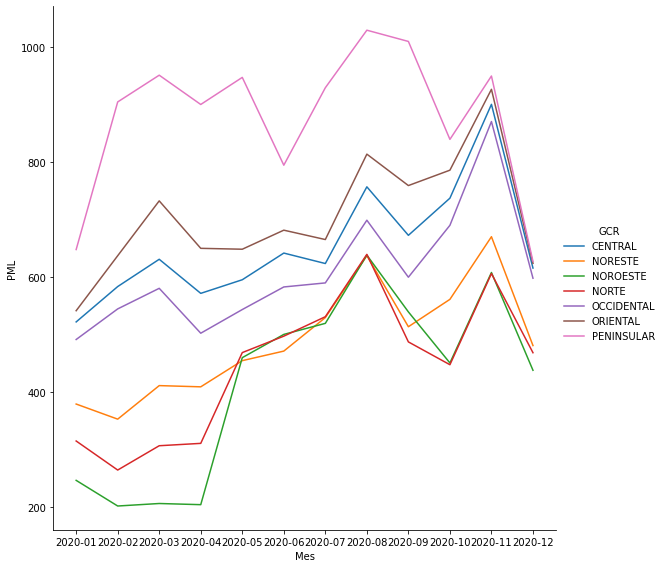

In [ ]:
sns.relplot(x='Mes',y='PML',data=gcr_mes_pml_prom,kind='line', hue='GCR',markers=True,height=8)
plt.show()

In [ ]:
gcr_pivot = gcr_mes_pml_prom.pivot(index='GCR',columns='Mes',values='PML')
gcr_pivot

Mes,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
GCR,,,,,,,,,,,,
CENTRAL,522.566924,584.024133,631.455950,572.229137,595.880414,642.252917,624.077478,757.397074,673.111833,737.680894,900.787488,616.194693
NORESTE,379.815486,353.545686,411.857106,409.732757,455.238346,471.862124,530.110284,637.738426,514.205719,561.807651,670.689804,481.472236
NOROESTE,247.135316,202.556352,206.912835,204.890194,460.437289,500.857633,520.064683,638.680551,539.981078,451.223665,608.470944,438.486086
NORTE,315.564259,265.066275,307.339560,311.449801,469.248627,497.807484,531.608243,640.017740,487.820457,448.168412,606.604554,469.019024
OCCIDENTAL,492.002361,545.185046,580.970206,502.935015,544.076535,583.350650,590.375556,699.367096,600.286922,690.521717,870.885260,598.564471
ORIENTAL,542.040867,637.627829,732.981002,650.487034,648.946958,682.057924,665.771885,814.230034,759.605820,786.354130,926.907799,624.374556
PENINSULAR,648.386591,904.963191,951.471685,900.560483,947.632389,795.025781,929.665875,1029.696302,1010.130653,839.874316,950.046101,627.680081


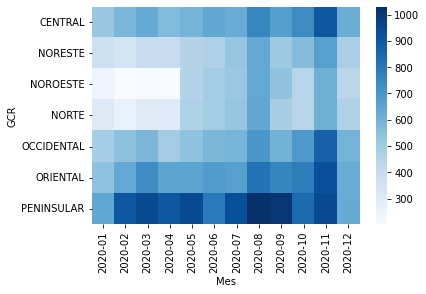

In [ ]:
sns.heatmap(gcr_pivot,cmap='Blues')

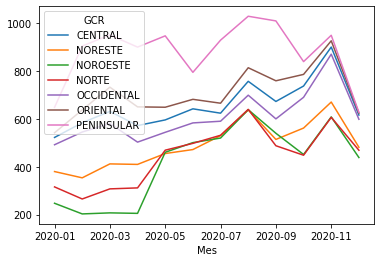

In [ ]:

gcr_pivot = gcr_mes_pml_prom.pivot(index='Mes',columns='GCR',values='PML')
gcr_pivot.plot.line()

# Regresión Lineal

Una regresión lineal busca hallar aquella recta que mejor se ajuste a una serie de puntos (x,y). Es decir, buscamos aquella recta $ y = mx + b$ con coeficientes $m$ y $b$ que mejor se ajuste a nuestros datos. Realizaremos un analisis sobre la relación entre el PML y la congestión. Obtendremos el promedio anual del PML por cada zona de carga. 

In [ ]:
print(pml.head(10))

       Fecha            Zona         PML
0 2020-01-01        ACAPULCO  436.570833
1 2020-01-01  AGUASCALIENTES  314.476667
2 2020-01-01      APATZINGAN  341.145000
3 2020-01-01         CABORCA  203.472917
4 2020-01-01         CAMARGO  273.548750
5 2020-01-01        CAMPECHE  502.061667
6 2020-01-01          CANCUN  506.288750
7 2020-01-01          CARMEN  509.951667
8 2020-01-01   CASAS GRANDES  244.626250
9 2020-01-01          CELAYA  315.746667


In [ ]:
# Promedio anual del PML de cada zona
PML_zone = pml.groupby(by='Zona')['PML'].mean().reset_index()
PML_zone

,Zona,PML
0,ACAPULCO,703.001416
1,AGUASCALIENTES,592.532645
2,APATZINGAN,646.356422
3,CABORCA,367.318539
4,CAMARGO,507.655175
...,...,...
96,ZACAPU,620.227473
97,ZACATECAS,599.569388
98,ZAMORA,621.130785
99,ZAPOTLAN,609.604478


In [ ]:
# Promedio anual de la congestion de cada zona
cong_zone = cong.groupby('Zona')['comp_cong'].mean().reset_index()

In [ ]:
cong_zone.sort_values(by='comp_cong')

,Zona,comp_cong
3,CABORCA,-116.903380
60,NOGALES,-115.298605
28,GUAYMAS,-114.915564
29,HERMOSILLO,-114.748430
39,JUAREZ,-95.690854
...,...,...
7,CARMEN,179.405017
58,MOTUL TIZIMIN,181.661761
12,CHETUMAL,184.935570
6,CANCUN,186.593252


Combinamos lo dos dataframes creados anteriormente.

In [ ]:
data_linereg = pd.merge(cong_zone,PML_zone)
data_linereg

,Zona,comp_cong,PML
0,ACAPULCO,53.630762,703.001416
1,AGUASCALIENTES,7.752893,592.532645
2,APATZINGAN,16.628782,646.356422
3,CABORCA,-116.903380,367.318539
4,CAMARGO,-31.762361,507.655175
...,...,...,...
96,ZACAPU,15.328314,620.227473
97,ZACATECAS,3.532711,599.569388
98,ZAMORA,15.334239,621.130785
99,ZAPOTLAN,16.120402,609.604478


Podemos crear una gráfica de la regresión lineal de manera rápida con la paquetería seaborn mediante ```sns.lmplot()```, pero no podemos acceder a los valores de los coeficientes ```m``` y ```b```

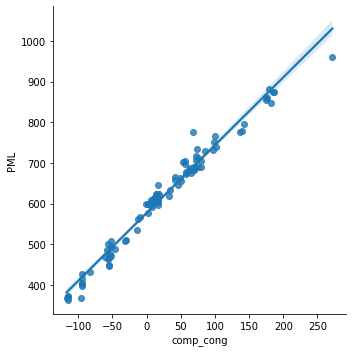

In [ ]:
sns.lmplot(x='comp_cong',y='PML',data=data_linereg,)

In [ ]:
from sklearn.linear_model import LinearRegression

con la función reshape, el -1 dice que nuestra matriz tendrá un número de ```n``` filas que python calculará, y el 1 indica que es de 1 columna

In [ ]:
nCong = cong_zone['comp_cong'].values.reshape(-1,1)
type(nCong)
nPML = PML_zone['PML'].values.reshape(-1,1)
type(nPML)

numpy.ndarray

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(nCong,nPML)

LinearRegression()

In [ ]:
PML_pred = linear_regressor.predict(nCong)
PML_pred

In [ ]:
#y = mx + b
m = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]

linreg_label = r'$PML = %0.4f*cong %+0.4f$'%(m,b)

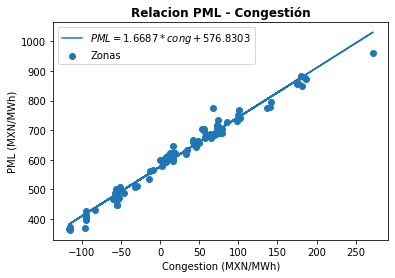

In [ ]:
plt.scatter(cong_zone['comp_cong'],PML_zone['PML'],label='Zonas')
plt.plot(nCong, PML_pred, label=linreg_label)
plt.ylabel('PML (MXN/MWh)', fontsize = 10)
plt.xlabel('Congestion (MXN/MWh)', fontsize=10)
plt.title('Relacion PML - Congestión', fontsize=12, weight='bold')
plt.legend()

Estadísticas de una regresión lineal. Observamos que arrojan los mismos resultados haciendo uso de la librería de estadística ```statsmodel```

*   Regresión Scikitlearn: m=1.6687 b=576.8303
*   Regresión Statsmodel : m=1.6687 b=576.8303 (columna ```coef```)




In [ ]:
import statsmodels.api as sm
model = sm.OLS(nPML,sm.add_constant(nCong))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4100.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           2.23e-82
Time:                        21:29:50   Log-Likelihood:                -447.15
No. Observations:                 101   AIC:                             898.3
Df Residuals:                      99   BIC:                             903.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.8303      2.133    270.406      0.0